# Import Libraries
Importing the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the data
Reading the source data 'titanic_train.csv' into a dataframe

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis
1. Missing Data

In [6]:
# check for null values
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

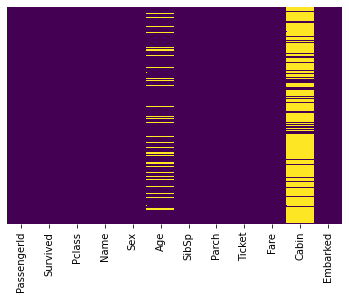

In [9]:
# Create a heatmap plot for the values using seaborn
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Data for 'Age' and 'Cabin' columns are missing.

The missing values for Age columns seem to less (~20%) and we can try to impute.

For 'Cabin', however, too much data is missing and it can be either dropped or converted to a binary attribute - 'Cabin Known': 0 or 1.

<AxesSubplot:xlabel='Survived', ylabel='count'>

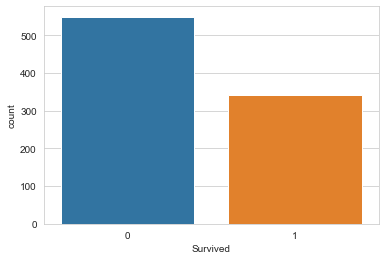

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

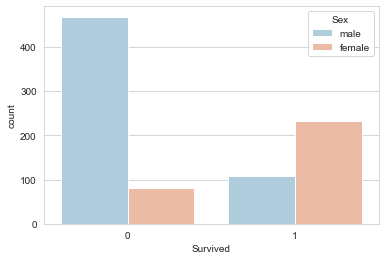

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

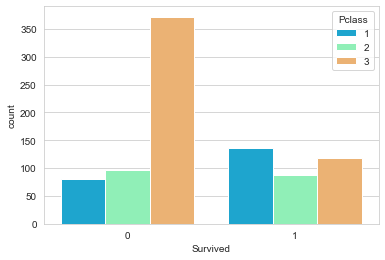

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

<AxesSubplot:xlabel='Age'>

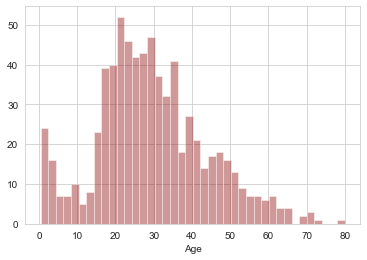

In [13]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)

<AxesSubplot:>

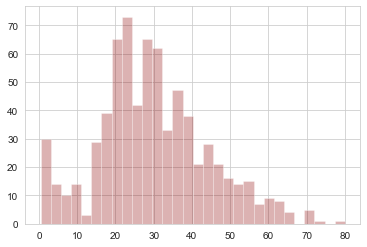

In [15]:
train['Age'].hist(bins=30, color='darkred', alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

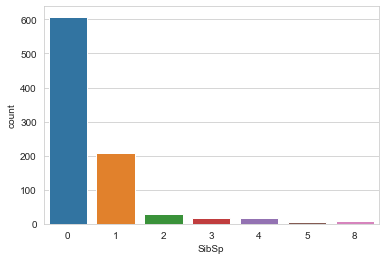

In [16]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

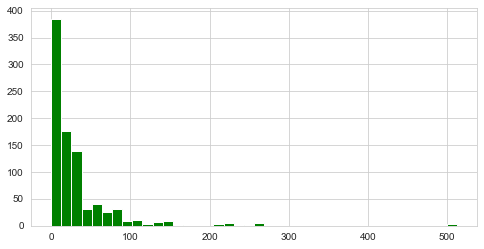

In [17]:
train['Fare'].hist(bins=40, color='green', figsize=(8,4))

# Cufflinks for plots
Example to show cufflinks

In [20]:
import cufflinks as cf

In [21]:
cf.go_offline()

In [22]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

# Data Cleaning
We are looking to fill the missing data for 'Age'.

Simpler way is to fill it with the mean age intuitively.

Smarter approach could be to check the average age by passenger class.


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

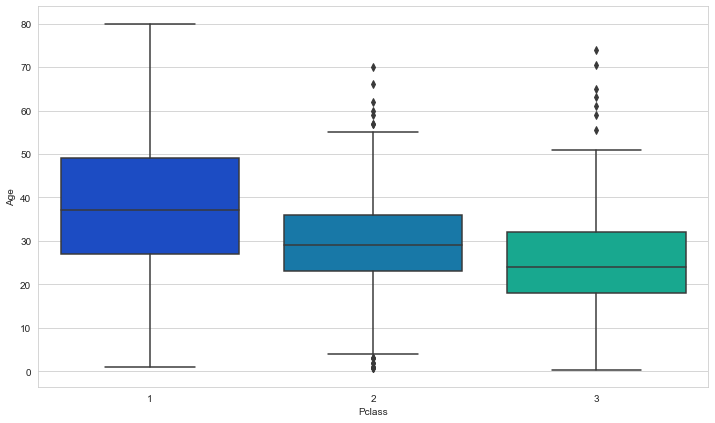

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

As we can see, wealthier passengers in the higher class tend to be older.

Creating a method to impute the avg age based on Pclass of Age:

In [28]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    avg_age=Age
    # classes = set(Pclass)

    if pd.isnull(Age):
        if Pclass == 1:
            avg_age = 37 # cols.loc[cols['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            avg_age = 29 # cols.loc[cols['Pclass'] == 2]['Age'].mean()
        else:
            avg_age = 24 # cols.loc[cols['Pclass'] == 3]['Age'].mean()
    else:
        avg_age = Age
    
    return avg_age

In [29]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

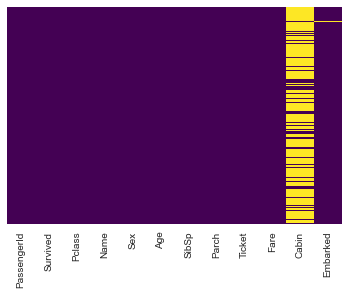

In [30]:
# Creating the heatmap again and checking post inputing the values for 'Age'
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Next lets drop the 'Cabin' column and also the one row within 'Embarked' with NaN value

In [36]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [37]:
set(train['Embarked'])

{'C', 'Q', 'S', nan}

In [38]:
train.dropna(inplace=True)

# Converting categorical Features
Converting the categorical features to dummy variables for the ML model to be able to directly take in those features as inputs

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 30.5+ KB


In [40]:
# converting the categorical variables into indicator or dummy variables
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [44]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [45]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1


In [47]:
train = pd.concat([train, sex, embark], axis=1)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1


In [49]:
sex

,male
1,0
3,0
6,1
10,0
11,0
...,...
871,0
872,1
879,0
887,0


In [50]:
embark

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1
...,...,...
871,0,1
872,0,1
879,0,0
887,0,1


In [52]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
6,7,0,1,54.0,0,0,51.8625,E46,1,0,1
10,11,1,3,4.0,1,1,16.7000,G6,0,0,1
11,12,1,1,58.0,0,0,26.5500,C103,0,0,1


In [54]:
train.drop('Cabin',axis=1,inplace=True)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1
6,7,0,1,54.0,0,0,51.8625,1,0,1
10,11,1,3,4.0,1,1,16.7000,0,0,1
11,12,1,1,58.0,0,0,26.5500,0,0,1


# Building the Logistic Regression Model

In [62]:
train_feature = train.drop('Survived',axis=1)

In [63]:
train_response = train['Survived']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(train_feature, train_response, test_size=0.3, random_state=101)

Training and Predicting

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [69]:
predictions = logmodel.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
accuracy = confusion_matrix(y_test, predictions)

In [72]:
accuracy

array([[12,  8],
       [ 5, 36]])

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy = accuracy_score(y_test, predictions)

In [75]:
accuracy

0.7868852459016393

In [76]:
predictions

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

# Model Evaluation

We check the precision, recall, f1-score using the classification report

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.82      0.88      0.85        41

    accuracy                           0.79        61
   macro avg       0.76      0.74      0.75        61
weighted avg       0.78      0.79      0.78        61

